1. 

En el archivo "logistic_regression_digits" hemos visto un ejemplo multiclase. Elimina todas las imágenes y etiqueta (label) cuyo valor del label no sea 1 o 9. Es decir, elimina todos los dígitos y quédate solo con los dígitos 1 y 9.

Ahora, realiza un entrenamiento con logistic regression con los nuevos datos:

- ¿Se mejora la precisión del algoritmo con dos clases? ¿por qué?

LogisticRegression() es una clase que tiene varios parámetros de entrada. Investiga (toca, modifica, prueba) las variables y comenta si hay alguna de ellas que, modificándola, mejore el porcentaje de acierto del problema.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.datasets import load_digits
digits = load_digits() 


import warnings
warnings.filterwarnings('ignore')

In [2]:
digits.data = digits.data[(digits.target == 1) | (digits.target == 9)]
digits.target = digits.target[(digits.target == 1) | (digits.target == 9)]

In [3]:
len(digits.data)

362

In [4]:
len(digits.target[digits.target == 9])

180

In [5]:
len(digits.target[digits.target == 1])

182

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, test_size=0.20)

In [7]:
model = LogisticRegression()

In [8]:
model.fit(X_train, y_train)

LogisticRegression()

In [9]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 1, 1, 9, 1, 1, 1, 9, 1, 9, 1, 9, 9, 1, 9, 9, 1, 9, 9, 1, 1,
       1, 9, 9, 9, 1, 9, 9, 1, 1, 1, 1, 1, 1, 9, 1, 1, 9, 1, 9, 9, 9, 1,
       9, 9, 1, 9, 1, 1, 1, 1, 1, 1, 9, 9, 9, 9, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 9, 1, 9, 9, 1, 9])

In [10]:
df_pred = pd.DataFrame({"value": y_test, "pred": y_pred})
df_pred["success"] = np.where(df_pred["value"] == df_pred["pred"], True, False)
df_pred

,value,pred,success
0,1,1,True
1,1,1,True
2,1,1,True
3,1,1,True
4,9,9,True
...,...,...,...
68,1,1,True
69,9,9,True
70,9,9,True
71,1,1,True


<AxesSubplot:>

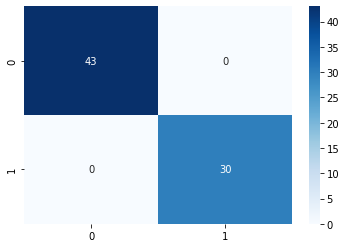

In [11]:
con_fun = confusion_matrix(y_test, y_pred)
sns.heatmap(con_fun, annot=True, cmap = 'Blues')

In [12]:
print(f"Este modelo tiene un accuracy del {int(model.score(X_test, y_test)*100)}% para estos datos")

Este modelo tiene un accuracy del 100% para estos datos


In [14]:
!pip3 install mlxtend

     |████████████████████████████████| 1.3 MB 1.5 MB/s eta 0:00:01


In [16]:
from mlxtend.evaluate import bias_variance_decomp

mse, bias, var = bias_variance_decomp(
    model, X_train, y_train, X_test, y_test, 
    loss = 'mse', num_rounds = 200) 

In [17]:
print("MSE: ", mse)
print("bias: ", bias)
print("variance: ", var)

MSE:  0.17534246575342466
bias:  0.030202739726027418
variance:  0.17534246575342466
